# 神经网络解决多分类问题
### 案例：手写数字识别
### 数据集：ex3data1.mat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize

#### 1.导入数据并展示
发现数据是以一个字典形式储存，“键”是数据集名称，“值”是数据。

In [2]:
data = sio.loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
raw_X = data['X']#取出X对应的“值”
raw_y = data['y']#y对应的“值”
print(raw_X.shape,raw_y.shape)

(5000, 400) (5000, 1)


#### 2.先随机选一张图片看看 

([], [])

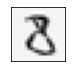

In [5]:
pick_one = np.random.randint(5000)    #随机生成一个0~4999之间的数字，每次运行生成的图片都是随机的
image = raw_X[pick_one,:]
frg,ax = plt.subplots(figsize =(1,1)) #指定生成图片的大小，画小一点
ax.imshow(image.reshape(20,20).T,cmap = 'gray_r')  #还原图片维度再转置一下
plt.xticks([])
plt.yticks([])    #去掉x,y轴刻度

#### 3.随机选一百张图片
写成一个函数

In [6]:
def plot_100_image(X):
    
    sample_index = np.random.choice(len(X),100)   #随机选100个数字，返回一个数组
    images = X[sample_index,:]
    print(images.shape)
    
    #设置图片样式：10行10列展示；设置图片大小；共享x，y轴属性
    frg,ax = plt.subplots(ncols=10,nrows=10,figsize=(12,12),sharex=True,sharey=True)
    for r in range(10):    #行
        for c in range(10):    #列
            ax[r,c].imshow(images[10*r+c,:].reshape(20,20).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([]) 
    
    plt.show

(100, 400)


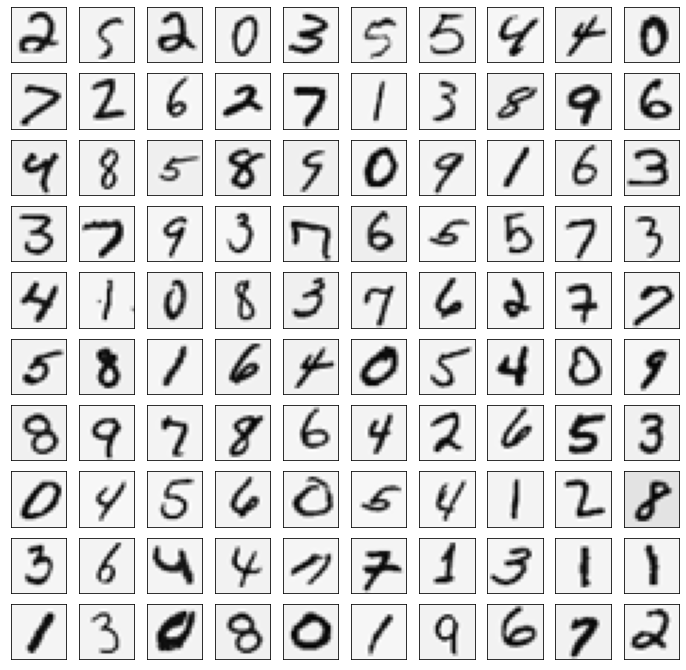

In [7]:
plot_100_image(raw_X)

#### 4.多分类器设计

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##### 代价函数公式：$ J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$
##### 其中  ${{h}_{\theta }}$ 为sigmoid函数

In [9]:
def costfunction(theta,X,y,lmd):
    
    A = sigmoid(X@theta)#先把sigmoid函数项算出来
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    reg = theta[1:]@theta[1:]*(lmd/(2*len(X)))
    
    return -(np.sum(first + second))/len(X) + reg   #负号提到外面

##### 梯度更新公式：${{\theta }_{j}}:={{\theta }_{j}}-a(\frac{1}{m}X^T(h_\theta(x)-y)+\frac{\lambda }{m}{{\theta }_{j}})$

In [10]:
#没有更新θ的
def grandent(theta,X,y,lmd):
    A = sigmoid(X@theta)
    reg = theta[1:]*(lmd/len(X)) #带正则化的梯度
    reg = np.insert(reg,0,values=0,axis=0) #留出位置给不带正则化的一项梯度
    first = (X.T @ (A - y))/len(X) #不带正则化的一项梯度
        
    return first + reg

In [11]:
X = np.insert(raw_X,0,values=1,axis=1)  #加入一列1对应于权重假设函数的theta_0，即截距项
X.shape

(5000, 401)

In [12]:
y = raw_y.flatten() #展平y便于后面准确率比较
y.shape

(5000,)

In [13]:
#分类器
def one_vs_all(X,y,lmd,k):   #k是标签个数
    n = X.shape[1]
    
    theta_all = np.zeros((k,n))   #前面已经把X的特征数量+1了，这里直接是n
    
    for i in range(1,K+1):   #i即为判断的数字,
        theta_i = np.zeros(n,)
        result = minimize(fun=costfunction,#优化的目标函数
                         x0=theta_i,#初始参数集
                         args=(X,y==i,lmd),#y==i是将y从类标签转换为是不是类i的二进制值（即0或1）
                         method = 'TNC',#指定优化方法
                         jac=grandent) #梯度函数
        theta_all[i-1,:] = result.x #分配参数
    return theta_all    #theta_all的维度是（10，401）

In [14]:
lmd = 1
K = 10

In [15]:
theta_final = one_vs_all(X,y,lmd,K)
print(theta_final)

[[-2.38161322e+00  0.00000000e+00  0.00000000e+00 ...  1.30443875e-03
  -7.46614921e-10  0.00000000e+00]
 [-3.18424598e+00  0.00000000e+00  0.00000000e+00 ...  4.45809777e-03
  -5.08268007e-04  0.00000000e+00]
 [-4.79683980e+00  0.00000000e+00  0.00000000e+00 ... -2.87602778e-05
  -2.47281993e-07  0.00000000e+00]
 ...
 [-7.98707330e+00  0.00000000e+00  0.00000000e+00 ... -8.94820479e-05
   7.21528197e-06  0.00000000e+00]
 [-4.57330391e+00  0.00000000e+00  0.00000000e+00 ... -1.33547404e-03
   9.98705604e-05  0.00000000e+00]
 [-5.40446774e+00  0.00000000e+00  0.00000000e+00 ... -1.16506760e-04
   7.86681357e-06  0.00000000e+00]]


In [16]:
#预测函数
def predict(X,theta_final):
    h = sigmoid(X@theta_final.T)   #X(5000,401)@theta_final.T(401,10)=>(5000,10)
    h_argmax = np.argmax(h,axis=1)  #获取一行里面概率最大的列的索引
    return h_argmax + 1

In [17]:
#计算准确率
y_pre = predict(X,theta_final)
acc = np.mean(y_pre == y)
print("准确率:{0}%".format(acc*100))

准确率:94.46%


In [17]:
from sklearn.metrics import classification_report #这个包是评价报告
print(classification_report(y, y_pre))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

